* Load the Library
* Visualise the data
* Declare the Data
    * sequential
    * Function
* Declare the layer
    * Dense , Dropout
    * No. of neuron, Activation Function
* Compile the data
    * Optimizer (SGD,Adam)
    * Loss Function (Cross Entropy,RMSE,MSE)
    * Metric (Accuracy,Precision,Recall)
* Fit the model
    * Pass x_train and y_train
    * Pass x_test and y_test
    * batch_size
    * epoch
* Predict and Evaluate

In [1]:
!unzip '/content/Fashion MNIST.zip'

Archive:  /content/Fashion MNIST.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

In [12]:
train=pd.read_csv('/content/fashion-mnist_train.csv')
test=pd.read_csv('/content/fashion-mnist_test.csv')

In [14]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x= train.drop('label' , axis=1)
y= train['label']

In [21]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [30]:
from sklearn.linear_model import Perceptron

In [34]:
per =Perceptron()
per.fit(x_train,y_train)
y_hat_train_per=per.predict(x_train)
y_hat_test_per=per.predict(x_test)

In [35]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))

In [36]:
model_eval(y_train,y_hat_train_per)

Accuracy Score:0.8388958333333333
Classification Report:              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4816
           1       0.98      0.97      0.97      4816
           2       0.68      0.84      0.75      4790
           3       0.75      0.93      0.83      4755
           4       0.84      0.47      0.60      4793
           5       0.95      0.92      0.94      4813
           6       0.63      0.59      0.61      4840
           7       0.92      0.94      0.93      4794
           8       0.94      0.94      0.94      4783
           9       0.95      0.95      0.95      4800

    accuracy                           0.84     48000
   macro avg       0.84      0.84      0.83     48000
weighted avg       0.84      0.84      0.83     48000

Confusion Matrix:[[4095   14   89  295   20    2  240    0   60    1]
 [  14 4654   12  117    4    0   11    0    3    1]
 [  58    9 4014   93  201    1  386    0   28    0]
 [ 144   

In [38]:
model_eval(y_train,y_hat_train_per)

Accuracy Score:0.8388958333333333
Classification Report:              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4816
           1       0.98      0.97      0.97      4816
           2       0.68      0.84      0.75      4790
           3       0.75      0.93      0.83      4755
           4       0.84      0.47      0.60      4793
           5       0.95      0.92      0.94      4813
           6       0.63      0.59      0.61      4840
           7       0.92      0.94      0.93      4794
           8       0.94      0.94      0.94      4783
           9       0.95      0.95      0.95      4800

    accuracy                           0.84     48000
   macro avg       0.84      0.84      0.83     48000
weighted avg       0.84      0.84      0.83     48000

Confusion Matrix:[[4095   14   89  295   20    2  240    0   60    1]
 [  14 4654   12  117    4    0   11    0    3    1]
 [  58    9 4014   93  201    1  386    0   28    0]
 [ 144   

In [39]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [40]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [42]:
model= Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))#layer1
model.add(Dense(64,activation='relu'))#layer2
model.add(Dense(64,activation='relu'))#layer3
model.add(Dense(10,activation='softmax'))#output layer
model.add


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Sequential.add of <Sequential name=sequential, built=True>>

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

compile the model

In [45]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
hist=model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5977 - loss: 8.0510 - val_accuracy: 0.7627 - val_loss: 0.7739
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7767 - loss: 0.7147 - val_accuracy: 0.7904 - val_loss: 0.6286
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8003 - loss: 0.5845 - val_accuracy: 0.7929 - val_loss: 0.5949
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8227 - loss: 0.5023 - val_accuracy: 0.8283 - val_loss: 0.4955
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8357 - loss: 0.4610 - val_accuracy: 0.8288 - val_loss: 0.4974
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8398 - loss: 0.4462 - val_accuracy: 0.8432 - val_loss: 0.4514
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8523 - loss: 0.4158 - val_accuracy: 0.8438 - val_loss: 0.4471
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8537 - loss: 0.3986 - val_accu

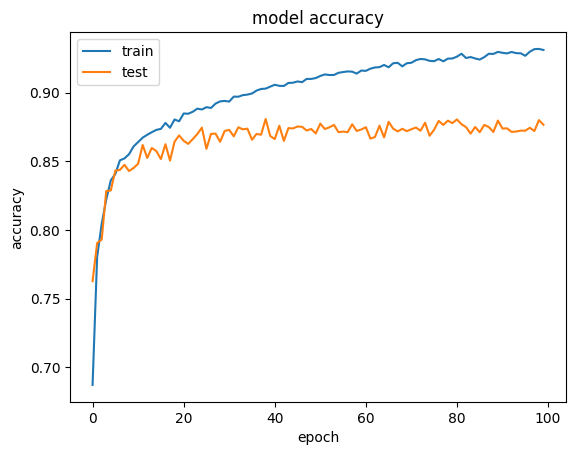

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

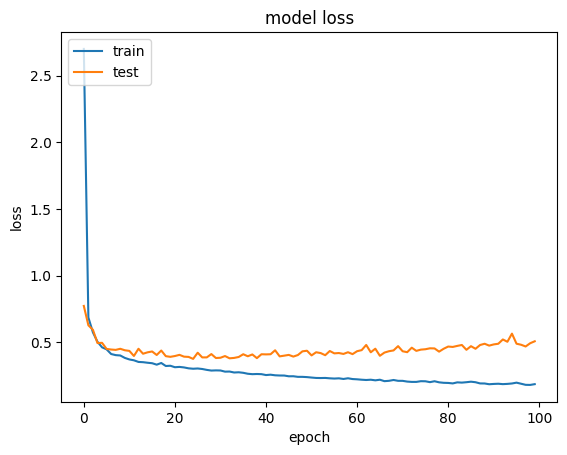

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [52]:
y_hat_train_dense=np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense=np.argmax(model.predict(x_test),axis=1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [53]:
y_hat_train_dense

array([9, 6, 7, ..., 5, 7, 3])

In [54]:
y_hat_test_dense

array([4, 2, 9, ..., 9, 5, 1])

In [55]:
model_eval(y_test,y_hat_test_dense)

Accuracy Score:0.8766666666666667
Classification Report:              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1184
           1       0.96      0.98      0.97      1184
           2       0.81      0.77      0.79      1210
           3       0.87      0.90      0.89      1245
           4       0.79      0.82      0.80      1207
           5       0.98      0.96      0.97      1187
           6       0.66      0.70      0.68      1160
           7       0.94      0.95      0.94      1206
           8       0.97      0.96      0.96      1217
           9       0.95      0.95      0.95      1200

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Confusion Matrix:[[ 920    2   35   41    7    0  168    0   11    0]
 [   1 1159    5   14    2    0    1    0    1    1]
 [   9    8  932   17  148    0   92    0    4    0]
 [  28   

In [56]:
model_eval(y_train,y_hat_train_dense)

Accuracy Score:0.9385833333333333
Classification Report:              precision    recall  f1-score   support

           0       0.94      0.86      0.90      4816
           1       0.99      1.00      0.99      4816
           2       0.90      0.85      0.88      4790
           3       0.93      0.96      0.94      4755
           4       0.86      0.89      0.87      4793
           5       1.00      1.00      1.00      4813
           6       0.80      0.85      0.83      4840
           7       0.99      0.99      0.99      4794
           8       0.99      0.99      0.99      4783
           9       1.00      0.99      0.99      4800

    accuracy                           0.94     48000
   macro avg       0.94      0.94      0.94     48000
weighted avg       0.94      0.94      0.94     48000

Confusion Matrix:[[4154   14   56   74    6    1  506    0    5    0]
 [   1 4802    0   11    1    0    1    0    0    0]
 [  15   10 4070   38  412    0  241    0    4    0]
 [  27   

In [57]:
model= Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))#layer1
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))#layer2
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))#layer3
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))#output layer
model.add

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Sequential.add of <Sequential name=sequential_1, built=True>>

In [58]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
hist=model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5447 - loss: 10.7869 - val_accuracy: 0.7221 - val_loss: 0.8080
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6902 - loss: 0.9129 - val_accuracy: 0.7672 - val_loss: 0.6448
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7462 - loss: 0.7315 - val_accuracy: 0.7865 - val_loss: 0.5834
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7630 - loss: 0.6693 - val_accuracy: 0.7895 - val_loss: 0.5640
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7712 - loss: 0.6219 - val_accuracy: 0.8030 - val_loss: 0.5180
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7808 - loss: 0.5913 - val_accuracy: 0.8005 - val_loss: 0.5152
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7820 - loss: 0.5795 - val_accuracy: 0.8072 - val_loss: 0.5035
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7880 - loss: 0.5676 -

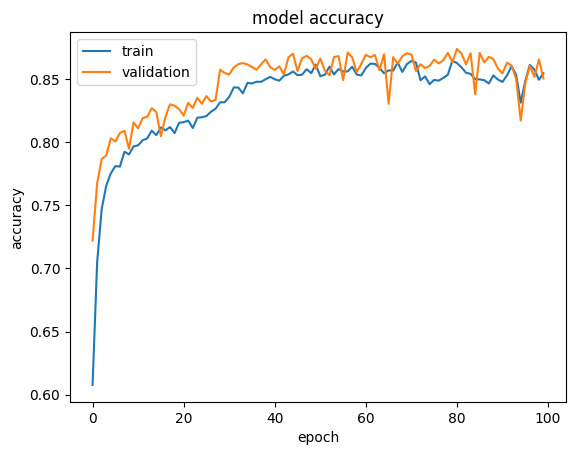

In [60]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

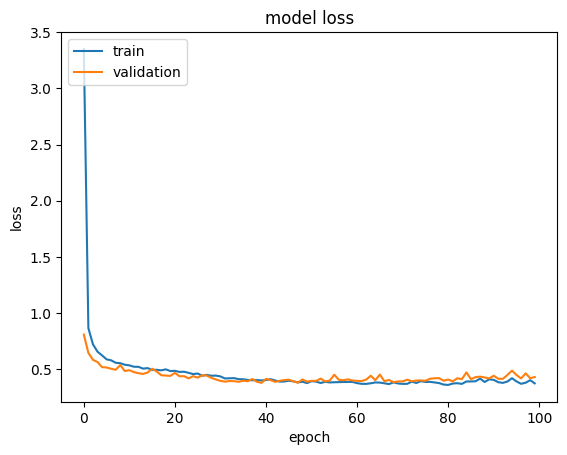

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [62]:
y_hat_train_dense=np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense=np.argmax(model.predict(x_test),axis=1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
y_hat_train_dense

array([9, 4, 7, ..., 5, 7, 3])

In [64]:
y_hat_test_dense

array([4, 2, 9, ..., 9, 5, 1])

In [65]:
model_eval(y_train,y_hat_train_dense)

Accuracy Score:0.8793333333333333
Classification Report:              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4816
           1       1.00      0.99      0.99      4816
           2       0.92      0.57      0.70      4790
           3       0.93      0.90      0.91      4755
           4       0.59      0.93      0.72      4793
           5       1.00      0.99      1.00      4813
           6       0.72      0.60      0.65      4840
           7       0.98      0.99      0.98      4794
           8       0.99      0.99      0.99      4783
           9       0.99      0.98      0.98      4800

    accuracy                           0.88     48000
   macro avg       0.90      0.88      0.88     48000
weighted avg       0.90      0.88      0.88     48000

Confusion Matrix:[[4150    2    8  105   20    0  513    0   18    0]
 [   7 4756    0   42    4    0    4    0    3    0]
 [  16    0 2729   28 1709    0  304    0    4    0]
 [  89   

In [66]:
model_eval(y_test,y_hat_test_dense)

Accuracy Score:0.8503333333333334
Classification Report:              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1184
           1       0.99      0.97      0.98      1184
           2       0.92      0.54      0.68      1210
           3       0.91      0.87      0.89      1245
           4       0.58      0.90      0.70      1207
           5       0.98      0.96      0.97      1187
           6       0.64      0.55      0.59      1160
           7       0.94      0.95      0.95      1206
           8       0.96      0.97      0.97      1217
           9       0.95      0.95      0.95      1200

    accuracy                           0.85     12000
   macro avg       0.87      0.85      0.85     12000
weighted avg       0.87      0.85      0.85     12000

Confusion Matrix:[[ 973    1    1   27    7    0  163    0   12    0]
 [   3 1154    1   16    3    0    6    0    1    0]
 [   4    0  650    9  460    0   80    1    6    0]
 [  42   